In [1]:
%matplotlib inline

In [2]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = ps.read_csv("../data/multiphase/results.csv")
f_escape = ps.read_csv("../data/multiphase/fesc_clumpy.csv")

In [4]:
data.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,2488.000000,2488.000000,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.0,...,2488.0,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.000000,2488.000000
mean,1243.500000,1751.326718,0.503793,1.003851e+07,19765.405626,0.273294,1.812311,35947.663087,0.0,5000.0,...,123456.0,1243.500000,7.824821e-08,0.624261,115.141952,5000.0,52.347079,52.405229,403.213443,0.014685
std,718.368058,719.642994,0.290414,1.238160e+07,12517.563531,0.254519,0.408114,34963.936803,0.0,0.0,...,0.0,718.368058,1.866427e-07,0.731703,49.115420,0.0,27.264105,27.270420,230.905401,0.022529
min,0.000000,501.423700,0.000239,3.000902e+05,5008.272000,0.030007,1.100000,1223.491797,0.0,5000.0,...,123456.0,0.000000,1.005050e-12,0.030072,30.036630,5000.0,0.000000,5.029782,0.000000,0.000100
25%,621.750000,1136.036250,0.257945,1.113740e+06,9150.848250,0.070621,1.460000,15125.707495,0.0,5000.0,...,123456.0,621.750000,3.505727e-11,0.090140,72.363635,5000.0,28.564707,28.462385,205.757975,0.000627
50%,1243.500000,1733.591500,0.498750,4.183082e+06,16161.255000,0.165121,1.820000,27170.775955,0.0,5000.0,...,123456.0,1243.500000,1.174529e-09,0.291594,114.176400,5000.0,52.302395,51.810935,398.557600,0.003414
75%,1865.250000,2365.887500,0.754240,1.489513e+07,28610.990000,0.412259,2.170000,48308.328566,0.0,5000.0,...,123456.0,1865.250000,3.257601e-08,0.912260,158.348575,5000.0,75.712417,75.430875,608.059750,0.017760
max,2487.000000,2998.644000,0.999992,4.977452e+07,49941.730000,0.998844,2.500000,577597.786685,0.0,5000.0,...,123456.0,2487.000000,9.980237e-07,2.996807,199.968800,5000.0,99.997650,99.964350,799.663300,0.099932


In [6]:
f_escape.describe()

,fesc_ion,fesc_lya
count,2.488000e+03,2488.000000
mean,3.685580e-02,0.601677
std,6.217918e-02,0.301803
min,1.789721e-51,0.003388
25%,4.061992e-03,0.349413
50%,1.199195e-02,0.662721
75%,3.762593e-02,0.881001
max,4.642314e-01,0.998857


In [50]:
n_models = len(chisq)
n_best = n_models/50
print n_best, n_models
chisq = data.chisq
min_chisq = chisq.min()
sorted_id = np.argsort(chisq)
ii = sorted_id[:n_best]
best_models = data.loc[ii]
f_esc_best_models = f_escape.loc[ii]
print len(chisq[ii])

49 2488
49


In [32]:
best_models.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.0,49.0,...,49.0,49.000000,4.900000e+01,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000
mean,1175.428571,1718.548876,0.650600,7.645298e+06,19503.435571,0.332687,1.811020,3145.179571,0.0,5000.0,...,123456.0,1175.428571,2.798906e-08,0.814324,108.256329,5000.0,66.695158,56.652956,99.746000,0.013962
std,689.854936,720.799084,0.294780,9.501852e+06,13096.983169,0.263886,0.448749,674.066238,0.0,0.0,...,0.0,689.854936,5.057769e-08,0.893061,44.657258,0.0,19.154012,28.303015,84.192972,0.017882
min,9.000000,504.174300,0.066267,3.429846e+05,5172.863000,0.034761,1.100000,1223.491797,0.0,5000.0,...,123456.0,9.000000,1.633967e-12,0.032025,30.465330,5000.0,11.605270,9.961078,1.372696,0.000118
25%,591.000000,1179.270000,0.419187,8.849539e+05,8182.175000,0.090999,1.390000,2830.445495,0.0,5000.0,...,123456.0,591.000000,6.137932e-11,0.115190,64.360520,5000.0,57.798310,32.928330,44.744290,0.000722
50%,1099.000000,1626.471000,0.782742,3.955738e+06,16524.050000,0.239958,2.000000,3345.021061,0.0,5000.0,...,123456.0,1099.000000,1.507635e-09,0.375817,105.655000,5000.0,69.718220,52.397310,77.739890,0.004729
75%,1785.000000,2372.834000,0.904230,1.275107e+07,30927.560000,0.553429,2.200000,3626.371789,0.0,5000.0,...,123456.0,1785.000000,2.501622e-08,1.327571,145.100500,5000.0,81.729570,79.884540,122.833800,0.026079
max,2423.000000,2977.269000,0.996017,4.237722e+07,49324.640000,0.909925,2.470000,4058.267860,0.0,5000.0,...,123456.0,2423.000000,2.014545e-07,2.960838,198.651900,5000.0,96.859500,99.852490,391.530100,0.062258


In [33]:
f_esc_best_models.describe()

,fesc_ion,fesc_lya
count,49.000000,49.000000
mean,0.015970,0.559994
std,0.038317,0.304097
min,0.000092,0.038445
25%,0.003213,0.286314
50%,0.006075,0.620128
75%,0.013991,0.805264
max,0.267885,0.983714


In [34]:
def plot_distros(fullsample, subsample, chi2sub, labelx):
    fig = plt.figure(1, figsize=(11,5))
    plt.clf()
    #plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=20)
    #plt.set_ticklabels(ax, size=35)
    n_full = len(fullsample)
    n_sub = len(subsample)
    #print type(fullsample)
    #print fullsample
    int_full = np.linspace(0.0,1.0,n_full)
    int_sub = np.linspace(0.0, 1.0, n_sub)
   
    plt.subplot(121)
    plt.plot(np.sort(fullsample), int_full ,label=r'${\rm Full\ Sample}$')
    plt.plot(np.sort(subsample), int_sub, label=r'${\rm Best\ Sample}$')
    plt.legend(loc=2, prop={'size':20})
    
    ks_stat, p_value = stats.ks_2samp(fullsample, subsample)
    
    ax = plt.gca()
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'${\rm Integrated\ Distribution}$', fontsize=20)
    
    plt.subplot(122)
    plt.scatter(subsample, chi2sub)
    
    ax = plt.gca()
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'$\chi^2$', fontsize=20)
    
    plt.savefig(labelx+'.png')
    plt.show(fig)
    plt.close(fig)
    return ks_stat, p_value

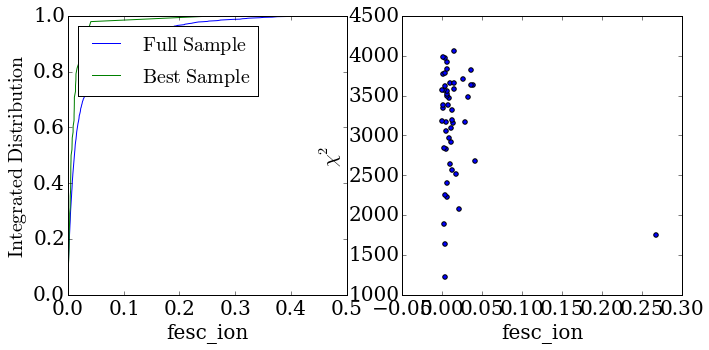

[ 0.23673817  0.60751502  2.20658514]
Pvalue 0.00669448559769


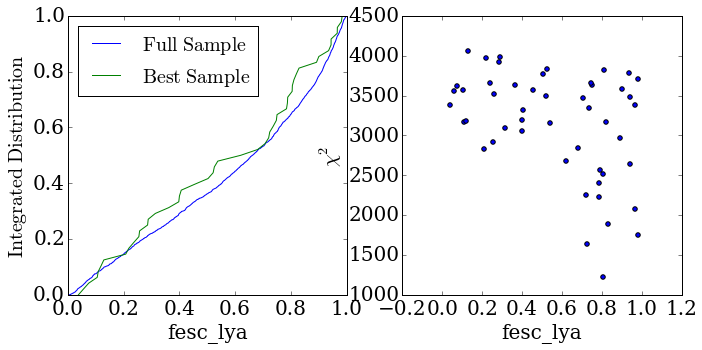

Pvalue 0.308318906123


In [35]:
ks_stat, p_value = plot_distros(f_escape['fesc_ion'].values, f_esc_best_models['fesc_ion'].values,
                     best_models['chisq'].values, 'fesc_ion')
best_q =  f_esc_best_models['fesc_ion'].quantile([0.16,0.50,0.84])
print best_q.values * 100
print "Pvalue {}".format(p_value)
ks_stat, p_value = plot_distros(f_escape[' fesc_lya'].values, f_esc_best_models[' fesc_lya'].values,
                     best_models['chisq'].values, 'fesc_lya')
print "Pvalue {}".format(p_value)

----
T_ICM
0.939387138182
[ 5.81431     6.59722752  7.22223544]


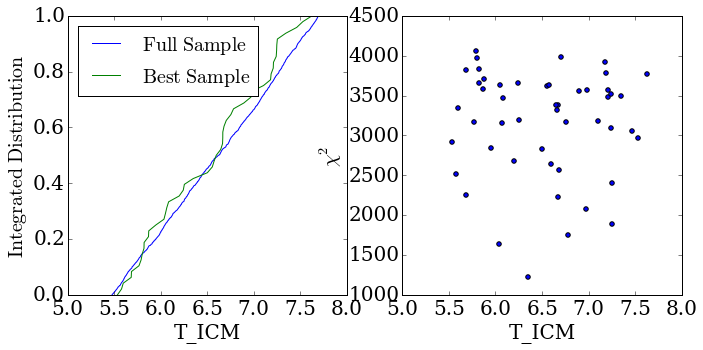

Pvalue 0.39238922837
----
n_HI_ICM
0.865556881802
[-10.68940165  -8.82170379  -7.14652251]


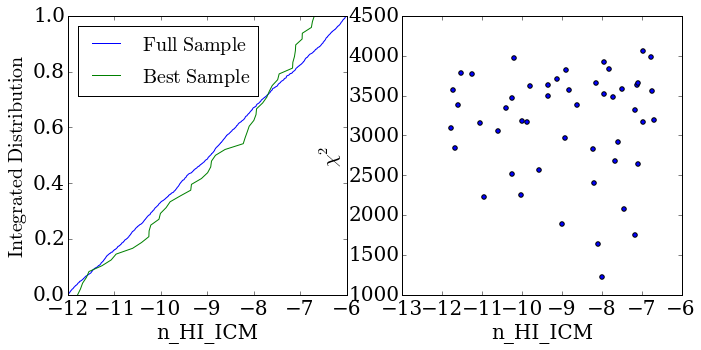

Pvalue 0.399872704755
----
T_cl
1.07172798659
[ 3.82038439  4.2181165   4.5429556 ]


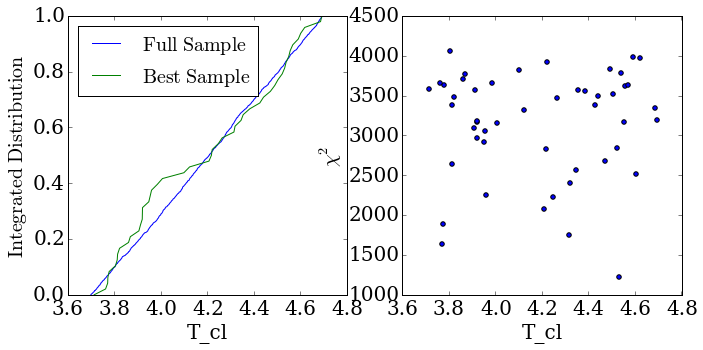

Pvalue 0.29932871942
----
n_HI_cl
1.0282725919
[-1.15598433 -0.42502335  0.22811265]


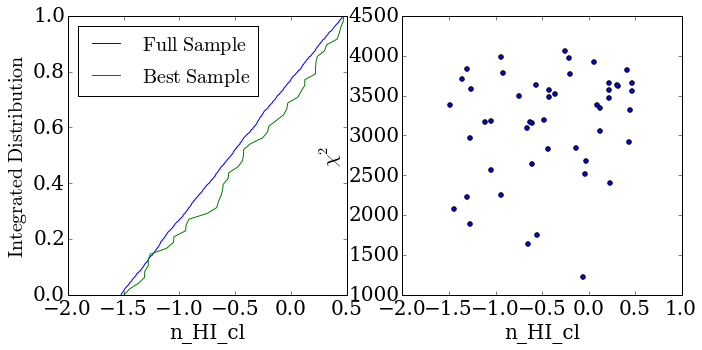

Pvalue 0.367532728351
----
zeta_Z
1.0412460896
[-3.61724465 -2.32520559 -1.47630015]


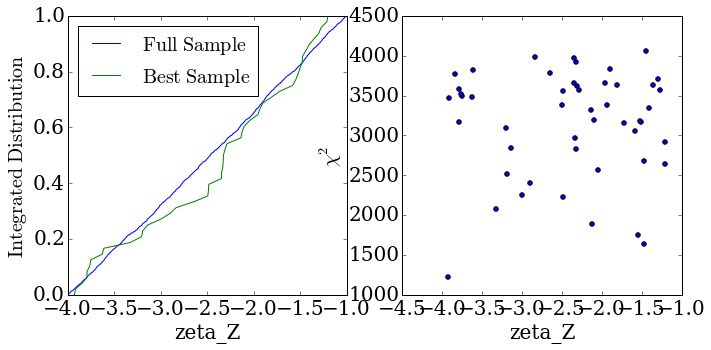

Pvalue 0.26755864648
----
H_em
0.896607564064
[ 1095.4698   1626.471    2622.05228]


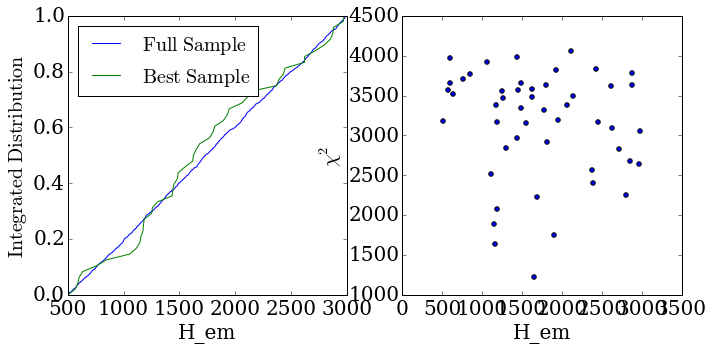

Pvalue 0.859032057849
----
P_cl
0.894763587425
[ 0.32628548  0.7827416   0.93824359]


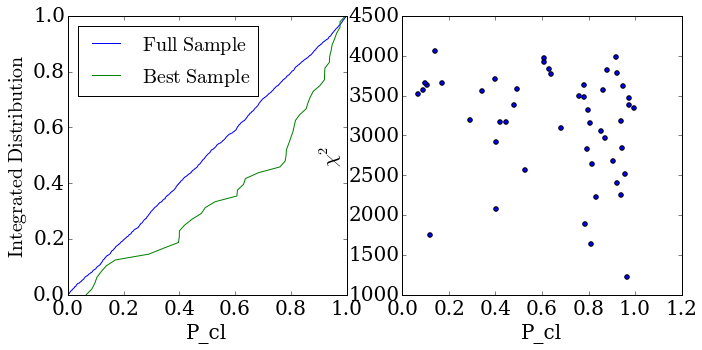

Pvalue 0.000143360473964
----
f_cl
0.772553504582
[ 2.35845646  4.24332923  6.15245411]


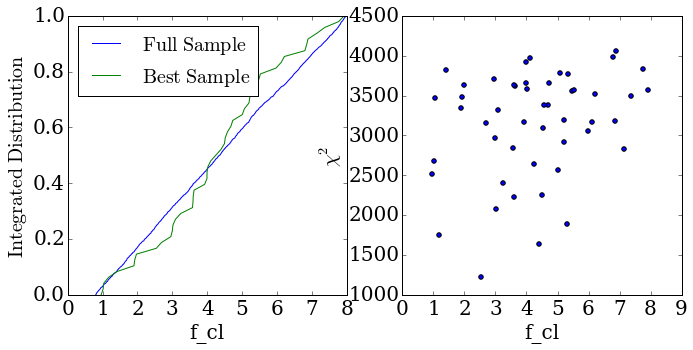

Pvalue 0.435478779882
----
sigma_i
1.06053820373
[ 25.8367592  52.39731    93.654314 ]


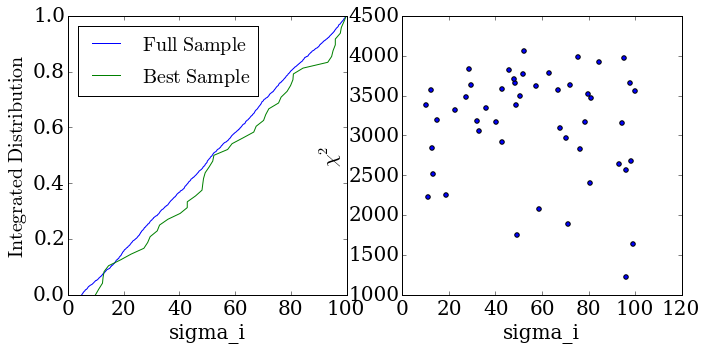

Pvalue 0.660834846688
----
beta_cl
1.10375
[ 1.2236  2.      2.2832]


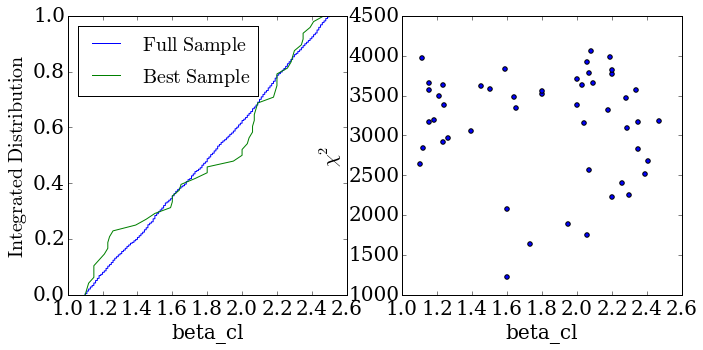

Pvalue 0.414349884195
----
sigma_cl
0.625854565882
[ 44.9099832  69.71822    85.0031492]


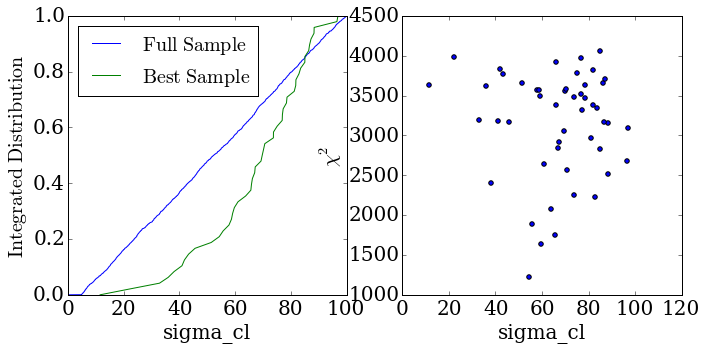

Pvalue 0.000119479903666
----
vinf_cl
0.24539089292
[  34.4155456   77.73989    167.616612 ]


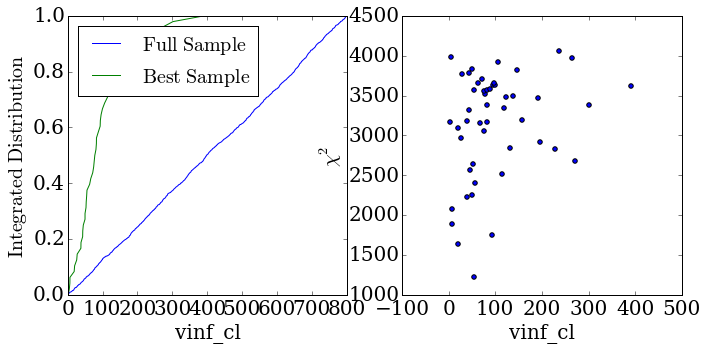

Pvalue 1.44000987702e-18
----
r_cl
0.770759487748
[  59.7918768  105.655      150.07424  ]


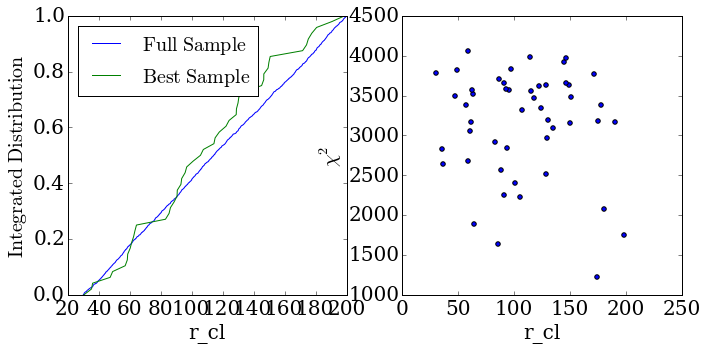

Pvalue 0.22031355049


In [36]:
column_log= ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z']
column_lin = ['H_em', 'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
columns = []
change = [] 
values = []
p_values = []
try_columns = ['P_cl', 'sigma_i', 'sigma_cl', 'vinf_cl']
try_columns = ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z','H_em', 
              'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
for column in try_columns:
    if column in column_log:
        print "----"
        print column
        best_q = np.log10(best_models[column].quantile([0.16,0.50,0.84]))
        all_q = np.log10(data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        _, pv = plot_distros(np.log10(data[column].values), np.log10(best_models[column].values), 
                     best_models['chisq'].values, column)
        p_values.append(pv)
        print "Pvalue {}".format(pv)
    if column in column_lin:
        print "----"
        print column
        best_q = (best_models[column].quantile([0.16,0.50,0.84]))
        all_q = (data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        _,pv = plot_distros((data[column].values), (best_models[column].values),
                     best_models['chisq'].values, column)
        p_values.append(pv)
        print "Pvalue {}".format(pv)
        #print column


# Exploring around the $\chi^2$ minimum

In [37]:
vinf_cl = best_models['vinf_cl'].values
sigma_cl = best_models['sigma_cl'].values
p_cl = best_models['P_cl'].values
chi2 = best_models['chisq'].values

best_model = np.argmin(chi2)
best_vinf_cl = vinf_cl[best_model]
best_sigma_cl = sigma_cl[best_model]
best_p_cl = p_cl[best_model]
best_chi2 = chi2[best_model]
print best_vinf_cl, best_sigma_cl, best_p_cl, best_chi2

54.35024 54.31802 0.9638437 1223.49179685


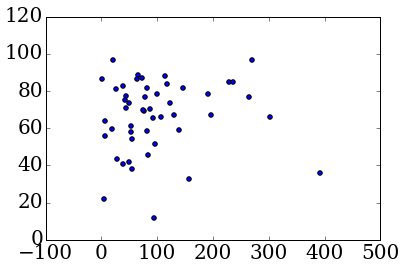

In [38]:
plt.scatter(vinf_cl, sigma_cl)

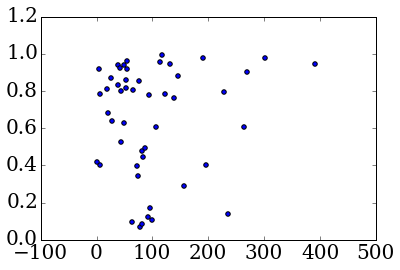

In [39]:
plt.scatter(vinf_cl, p_cl)

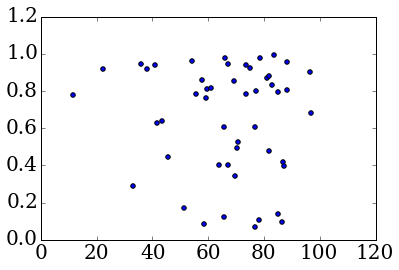

In [40]:
plt.scatter(sigma_cl, p_cl)

In [41]:
x = vinf_cl - best_vinf_cl
y = sigma_cl - best_sigma_cl
z = p_cl - best_p_cl
w = chi2 -  best_chi2
def residuals(p):
    f = x**2/(2.0*p[0]**2)
    f += y**2/(2.0*p[1]**2)
    f += z**2/(2.0*p[2]**2)
    res = np.sum((w - f)**2)/1E6
    return res

def model(p):
    f = x**2/(2.0*p[0]**2)
    f += y**2/(2.0*p[1]**2)
    f += z**2/(2.0*p[2]**2)
    return f

In [42]:
from scipy.optimize import minimize

methods = ['Nelder-Mead','Powell', 'CG', 'BFGS','L-BFGS-B','TNC','COBYLA', 'SLSQP']

for method in methods:
    p = [ 5.0,  5.0,  0.1]
    res = minimize(residuals,p,method=method, tol=1e-6, options={'maxiter':2000, 'disp':True})
    p_min = res['x']
    print method, p_min, res['fun']

Optimization terminated successfully.
         Current function value: 62.317146
         Iterations: 303
         Function evaluations: 539
Nelder-Mead [ 5.16044587 -0.58278666  0.01416063] 62.3171461169
Optimization terminated successfully.
         Current function value: 62.317146
         Iterations: 6
         Function evaluations: 311
Powell [ 5.16041639  0.58278812 -0.01416067] 62.3171461205
         Current function value: 87.440160
         Iterations: 23
         Function evaluations: 377
         Gradient evaluations: 73
CG [ 5.09677074  0.51424981 -9.34051775] 87.4401596499
         Current function value: 66.047745
         Iterations: 27
         Function evaluations: 387
         Gradient evaluations: 75
BFGS [ 5.11802215  0.51403909  0.01534657] 66.0477447822
L-BFGS-B [ 4.98149686  4.99822357  0.01154854] 105.336777753
TNC [ 5.15921157  0.58282589  0.01416032] 62.3171480425
COBYLA [ 3.65917265  4.68335494  0.01183419] 102.207085786
Optimization terminated successfully.

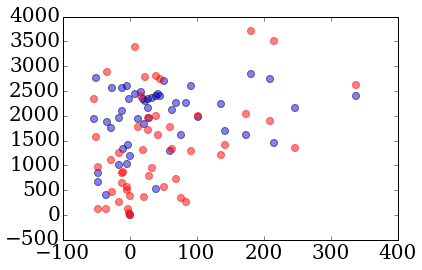

In [43]:
p = [ 5.15921157 , 0.58282589,  0.01416032]
chi2_m = model(p)
plt.scatter(x, w, s=50, alpha=0.5)
plt.scatter(x, chi2_m, color='red', s=50.0, alpha=0.5)

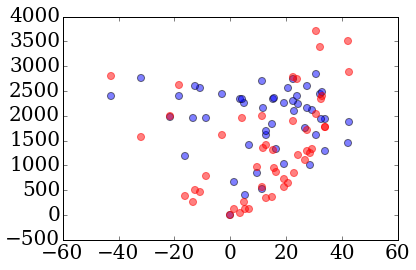

In [44]:
plt.scatter(y, w, s=50, alpha=0.5)
plt.scatter(y, chi2_m, color='red', s=50.0, alpha=0.5)

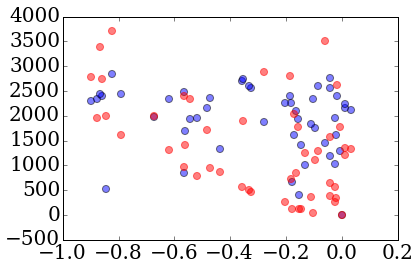

In [45]:
plt.scatter(z, w, s=50, alpha=0.5)
plt.scatter(z, chi2_m, color='red', s=50.0, alpha=0.5)

In [49]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy import units as u
sigma_clouds= np.array([best_sigma_cl-p[1], best_sigma_cl, best_sigma_cl+p[1]])

r = 5.0 * kpc.to('cm')
print r
sigma = sigma_clouds * u.kilometer / u.second
print sigma
dynamical_mass = r * sigma **2 / (2.0*G.cgs)
dynamical_mass.to('M_sun')

1.54283879073e+22 cm
[ 53.73519411  54.31802     54.90084589] km / s


<Quantity [  1.67793754e+09,  1.71453363e+09,  1.75152451e+09] solMass>

In [ ]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy.cosmology import default_cosmology
from barak import virial
n_points = 100
z = 0.0
mass = np.logspace(9,12,n_points)
mu = 0.59
km = 1e5
cosmo = default_cosmology.get()
rho_virial = virial.deltavir(z, cosmo=cosmo) * cosmo.critical_density(z) 
M_g = mass * M_sun.cgs
rvir = ((3 * M_g) / (4 * np.pi * rho_virial))**(1./3)
#print rvir.to('kpc')
vcirc = np.sqrt(G.cgs * M_g / rvir)
#print vcirc.to('km/s')
Tvir = mu * m_p.cgs * vcirc * vcirc / (2 * k_B.cgs)
#print Tvir.to('Kelvin')

In [ ]:
data_update = ps.read_csv("../data/multiphase/results_2.csv")
chisq = best_models['chisq'].values
chisq_update = data_update['chisq'].values
sigma_cl_update = data_update['sigma_cl'].values

In [ ]:
chisq.sort()
chisq_update.sort()

In [ ]:
plt.plot(chisq/100.0, np.linspace(0.0,1.0, len(chisq)))
plt.plot(chisq_update/100, np.linspace(0.0,1.0, len(chisq_update)))
plt.xlim(0,30)

In [ ]:
plt.scatter(sigma_cl_update, chisq_update)